In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-science-bowl-2019/test.csv
/kaggle/input/data-science-bowl-2019/sample_submission.csv
/kaggle/input/data-science-bowl-2019/train_labels.csv
/kaggle/input/data-science-bowl-2019/specs.csv
/kaggle/input/data-science-bowl-2019/train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Data

In [3]:
root = '/kaggle/input/data-science-bowl-2019/'

print('Reading train.csv file ...', end='')
train = pd.read_csv(root + 'train.csv')  # training data
print(' Done!')

print('Reading train_labels.csv file ...', end='')
train_labels = pd.read_csv(root + 'train_labels.csv') 
print(' Done!')

print('Reading test.csv file ...', end='')
test = pd.read_csv(root + 'test.csv')
print(' Done!')

print('Reading specs.csv file ...', end='')
specs = pd.read_csv(root + 'specs.csv')
print(' Done!')

Reading train.csv file ... Done!
Reading train_labels.csv file ... Done!
Reading test.csv file ... Done!
Reading specs.csv file ... Done!


What does the data look like ?

In [16]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""id...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""id...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK
5,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.279Z,"{""coordinates"":{""x"":583,""y"":605,""stage_width"":1015,""stage_height"":762},""event_count"":4,""game_time"":9991,""event_code"":4070}",0001e90f,4,4070,9991,Sandcastle Builder (Activity),Activity,MAGMAPEAK
6,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.913Z,"{""coordinates"":{""x"":601,""y"":570,""stage_width"":1015,""stage_height"":762},""event_count"":5,""game_time"":10622,""event_code"":4070}",0001e90f,5,4070,10622,Sandcastle Builder (Activity),Activity,MAGMAPEAK
7,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.546Z,"{""coordinates"":{""x"":250,""y"":665,""stage_width"":1015,""stage_height"":762},""event_count"":6,""game_time"":11255,""event_code"":4070}",0001e90f,6,4070,11255,Sandcastle Builder (Activity),Activity,MAGMAPEAK
8,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.979Z,"{""coordinates"":{""x"":279,""y"":629,""stage_width"":1015,""stage_height"":762},""event_count"":7,""game_time"":11689,""event_code"":4070}",0001e90f,7,4070,11689,Sandcastle Builder (Activity),Activity,MAGMAPEAK
9,1325467d,0848ef14a8dc6892,2019-09-06T17:55:08.566Z,"{""coordinates"":{""x"":839,""y"":654,""stage_width"":1015,""stage_height"":762},""event_count"":8,""game_time"":12272,""event_code"":4070}",0001e90f,8,4070,12272,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [5]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [6]:
pd.set_option('max_colwidth', 150)
specs.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
1,df4fe8b6,The end of system-initiated feedback (Incorrect) event occurs when the game finishes delivering feedback to the player in response to an incorrect...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""description"",""type"":""string"",""info"":""the text or descri..."
2,3babcb9b,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that de...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
3,7f0836bf,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that de...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."
4,ab3136ba,The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that de...,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round..."


Is there missing data ?

In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(train)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,object,int64,int64,int64,object,object,object


In [9]:
missing_data(train_labels)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
Total,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0
Types,object,object,object,int64,int64,float64,int64


In [10]:
missing_data(test)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,object,int64,int64,int64,object,object,object


Children can select different type of activities between watching videos clips, playing games, doing an activity or taking an assessment. How are those categories present ?

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

train_types = train["type"].value_counts()
test_types = test["type"].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(values=train_types, labels=train_types.index.tolist(), name="Train" , hole=.3),
    1, 1)

fig.add_trace(
    go.Pie(values=test_types, labels=test_types.index.tolist(), name="Test" , hole=.3),
    1, 2)

fig.update_traces(hoverinfo='label+percent+value', textinfo='percent', textfont_size=17, textposition="inside",
                  marker=dict(colors=['gold', 'mediumturquoise', 'darkorange', 'plum'],  
                              line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Media Type of The Game or Video",
    height=500, width=800,
    annotations=[dict(text='Train', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Test', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [13]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

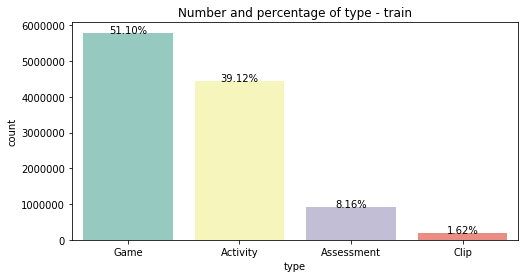

In [14]:
plot_count('type', 'type - train', train, size=2)

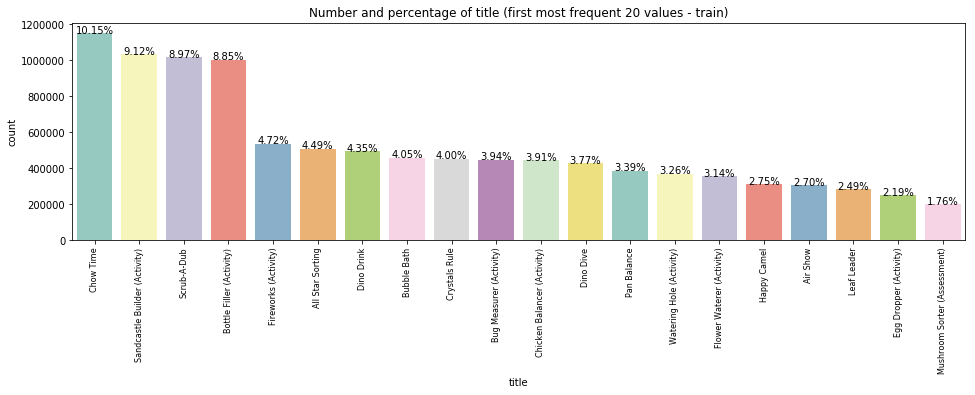

In [15]:
plot_count('title', 'title (first most frequent 20 values - train)', train, size=4)